# $M/HYPO_r/1$ queue
Arrival rate $\lambda$

perpareTransfer and sendTrytes service rates are $\mu_1$ and $\mu_2$, respectively.

$Q = \begin{pmatrix}
B_{00} &B_{01}  & 0 & 0 & 0 & \ldots\\ 
B_{10} & A_{1} & A_{2} & 0 & 0 &\dots \\ 
 0& A_{0} &  A_{1} & A_{2}  & 0 &\ldots \\ 
 0&  0& A_{0} &  A_{1}  & A_{2} & \\ 
 0&  0&  0& A_{0} &  A_{1}  & \ldots\\ 
 \vdots& \vdots & \vdots & \vdots & \vdots & \ddots
\end{pmatrix}$

- $A_0$: Transitions from state (k, r) to state (k − 1, 1), the transit rate of the last service phase.
- $A_1$: The superdiagonal elements of the matrices $A_1$ represent phase completion to state (k + 1, i ). It follows that the only nonzero elements in this matrix are the diagonal elements The diagonal elements are set equal to the negated sum of the off-diagonal elements of Q. All other at rate rμ in service phase i < r at level k > 0, i.e., transitions from state (k, i ) to state (k, i + 1).
- $A_2$: The matrices A2 represent arrivals at rate λ which can occur during service at any phase i at any level k > 0, i.e., transitions from state (k, i ) which are all equal to λ.
- $B_{01}$: A 1 × r row matrix all of whose elements are zero except for the first which is equal to $\lambda$. This is the rate of transition from state (0, 0) to state (1, 1) and corresponds to an arrival to an empty system.
- $B_{10}$: A r × 1 column matrix all of whose elements are zero except for the last which is equal to $\mu_r$. This is the rate of transition from state (1, r) to state (0, 0) and corresponds to the complete service termination of the only customer in the system.
- $B_{00}$: A 1×1 matrix whose nonzero element is $-\lambda$ and reflects the fact that the sum across the first row must be zero.

$A_0=\begin{pmatrix}
0 & 0  & 0 & 0 & \ldots & 0\\ 
0 & 0 & 0 & \ldots & \ldots &0 \\ 
 0& 0 &  0 & 0  & \ldots &0 \\ 
 0&  0& 0 &  0  & \ldots & 0\\ 
 \vdots& \vdots & \vdots & \vdots &\ddots & \vdots\\ 
 \mu_r & 0 & 0 & 0 & \ldots & 0
\end{pmatrix}$,$A_2=\lambda I_r$, $A_1 = \begin{pmatrix}
-\lambda-\mu_1 & \mu_1  & 0 & 0 & \ldots & 0\\ 
0 & -\lambda-\mu_2 & \mu_2 & 0 & \ldots &0 \\ 
0 & 0 &  -\lambda-\mu_3 & \mu_3  & \ldots &0 \\ 
\vdots& \vdots & \vdots & \ddots &\ddots & \vdots\\ 
0&  0& 0 &  0  & \vdots & \mu_{r-1}\\
 0 & 0 & 0 & 0 & \ldots & -\lambda-\mu_r
\end{pmatrix}$

$B_{00}=-\lambda$,$B_{01}=\begin{pmatrix}
\lambda & 0 & 0 & \ldots & 0
\end{pmatrix}$,$B_{10}=\begin{pmatrix}
0\\ 
0\\  
\vdots\\ 
0 \\
\mu_r
\end{pmatrix}$


## block submatrices $A_i/B_i$ experssed by partitioned matrices
For a Ph/Ph/1 queue with ra phases in the description of the arrival process and rs phases in the description of the service process, the block submatrices required for the application of the matrix geometric approach are given by:

$A_0=I_{r_a}\otimes (S^{0}\cdot \sigma ),
A_1=T\otimes I_{r_s}+I_{r_a}\otimes S,
A_2=(T^{0}\otimes \xi)\otimes I_{r_s},$

$
B_{00}=T,
B_{01}=(T^{0}\cdot \xi)\otimes \sigma,
B_{10}=I_{r_a}\otimes S^{0}$

where

${S}'=\left(\begin{array}{@{}ccccc|c@{}}
    -\mu_{1} & \mu_{1} & 0 & 0 & 0 & 0 \\
    0 & -\mu_{2} & \mu_{2} & 0 & 0 & 0 \\
    0 & 0 & -\mu_{3} & \mu_{3} & 0 & 0 \\
    \vdots & \vdots & \vdots & \ddots & \vdots& \vdots \\
    0 & 0 & 0 & 0 & -\mu_{r_a}  & \mu_{r_a} \\\hline    
    0 & 0 & 0 & 0 & 0 & 0 
  \end{array}\right)
=\begin{pmatrix}
S & S^{0}\\ 
0 & 0
\end{pmatrix}$,
${\sigma }'=\left ( \begin{array}{@{}ccccc|c@{}} 
1&0&0&\ldots &0&0
\end{array}\right )=\begin{pmatrix}
\sigma  & 0
\end{pmatrix}$


${T}'=\left(\begin{array}{@{}cccc|c@{}}
    -\lambda_{1} & 0 &  0 & 0 & \lambda_{1} \\
    0 & -\lambda_{2} &  0 & 0 & \lambda_{2}  \\
    \vdots & \vdots & \vdots & \vdots& \vdots \\
    0 & 0 & 0 & -\lambda_{r_s}  & \lambda_{r_s}  \\\hline    
    0 & 0 & 0 & 0 & 0 
  \end{array}\right)
=\begin{pmatrix}
T & T^{0}\\ 
0 & 0
\end{pmatrix}$,
${\xi }'=\left ( \begin{array}{@{}ccccc|c@{}} 
\alpha_1&\alpha_2&\alpha_3&\ldots &\alpha_{r_s}&0
\end{array}\right )=\begin{pmatrix}
\xi  & 0
\end{pmatrix}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import kron,eye,zeros,ones,multiply,dot
from numpy.linalg import inv,norm,matrix_power

from utils import ProcHarData, ProcLocustData

In [15]:
class PhQueue:
    
    def __init__(self,lambda1,mu1,mu2):
        self.lambda1 = lambda1
        self.T = np.array([-lambda1])
        self.T0 = np.array([lambda1])
        self.xi = np.array([1])
        
        self.mu1 = mu1
        self.mu2 = mu2
        self.S = np.array([[-mu1, mu1],[0, -mu2]])
        self.S0 = np.array([[0],[mu2]])
        self.sigma = np.array([1,0])
        
        self.ra = len(self.T)
        self.rs = len(self.S[0])
        self.A0 = kron(eye(self.ra), multiply(self.S0,self.sigma))
        self.A1 = kron(self.T, eye(self.rs)) + kron(eye(self.ra), self.S)
        self.A2 = kron(multiply(self.T0,self.xi), eye(self.rs))
        self.B00 = self.T
        self.B01 = kron(multiply(self.T0,self.xi),self.sigma)
        self.B10 = kron(eye(self.ra),self.S0)
        self.l = len(self.B00)
        self.r = len(self.A0[0])
    
        
    def formBeutsRMatrix(self,err=1.0e-10):
        V = dot(self.A2, inv(self.A1))
        W = dot(self.A0, inv(self.A1))
        R = zeros((self.r,self.r)) 
        Rbis = -V - dot(dot(R,R), W)
        n = 1
        while (norm(R-Rbis,1) > err):
            R = Rbis
            Rbis = -V - dot(dot(R,R), W)
            n = n+1
        R = Rbis
        return R
    
    
    def checkStability(self):
        meanLambda = self.lambda1
#         meanMu = 1/norm(-self.sigma * inv(self.S),1)
        meanMu = 1/(1/self.mu1+1/self.mu2)
        rho = meanLambda/meanMu
        return rho
        
        
    def solveBounaryEquations(self):
        R = self.formBeutsRMatrix()
        
        head = np.concatenate((np.array(self.B00),self.B01),axis=0)
        tail = np.concatenate((self.B10,self.A1+dot(R,self.A0)),axis=1)
        N = np.vstack((head,tail))
        r = self.r
        N[0,r] = 1
        for k in range(1,r+1):
            N[k,r]=0

        rhs = zeros(r+1)
        rhs[r] = 1

        soln = dot(rhs,inv(N))
        pi0 = soln[:1]
        pi1 = soln[1:]

        e = ones((r,1))
        sumation = norm(pi0,1) + dot(dot(pi1, inv(eye(r)-R)), e)
        pi0 = pi0/sumation
        pi1 = pi1/sumation
        return pi0,pi1
        
    def printRes(self,max=10):
        R = self.formBeutsRMatrix()
        pi0,pi1 = self.solveBounaryEquations()
        
        pop = zeros((max+1,1))
        pop[0,0] = norm(pi0,1)
        for k in range(1,max+1):
            pi = pi1 * matrix_power(R,(k-1)) # Get successive components of pi
            pop[k,0] = norm(pi,1)
        print(pop)
        
        
    def measurePerf(self):
        R = self.formBeutsRMatrix()
        _,pi1 = self.solveBounaryEquations()
        
        EN = norm(pi1*(matrix_power(eye(self.r)-R,-2)),1)
        ER = EN/self.lambda1
        return EN,ER

In [46]:
lambdas,mu1,mu2 = np.arange(15,175,20),500,500
ls_EN, ls_ER, ls_rho = [],[],[]
for lam in lambdas:
    queue = PhQueue(lam,mu1,mu2)
    EN,ER = queue.measurePerf()
    rho = queue.checkStability()
    ls_EN.append(EN)
    ls_ER.append(ER)
    ls_rho.append(rho)
    print(lam,'EN:',EN, ' ER:', ER, ' rho:', rho)

15 EN: 0.03183047265948359  ER: 0.0021220315106322395  rho: 0.06
35 EN: 0.08025662871806895  ER: 0.00229304653480197  rho: 0.14
55 EN: 0.1363024680701497  ER: 0.00247822669218454  rho: 0.22
75 EN: 0.20137633927519236  ER: 0.002685017857002565  rho: 0.3
95 EN: 0.277866177219592  ER: 0.002924907128627284  rho: 0.38
115 EN: 0.36988787827974146  ER: 0.003216416332867317  rho: 0.46
135 EN: 0.4872926477774574  ER: 0.0036095751687219065  rho: 0.54
155 EN: 0.6724949630128549  ER: 0.0043386771807280965  rho: 0.62


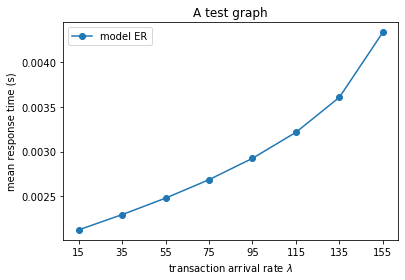

In [47]:
fig,ax = plt.subplots()

ax.plot(lambdas,ls_ER, marker='o',label='model ER')
ax.set_xticks(lambdas)
ax.set_xlabel("transaction arrival rate $\lambda$")
ax.set_ylabel("mean response time (s)")
ax.set_title("A test graph")
ax.legend()

fig.show()

## Rh Symbolic solution
$R_h=\begin{pmatrix}
\frac{\lambda(\lambda+\mu_2)}{\mu_1\mu_2} & \frac{\lambda}{\mu_2}\\ 
\frac{\lambda^2}{\mu_1\mu_2} & \frac{\lambda}{\mu_2}
\end{pmatrix}$

In [262]:
Rh = np.array([[lambda1*(lambda1+mu2)/(mu1*mu2),lambda1/mu2],
      [np.power(lambda1,2)/(mu1*mu2),lambda1/mu2]])
Rh

array([[0.15625, 0.25   ],
       [0.03125, 0.25   ]])

In [5]:
filename = 'data/locustdata.xlsx'
tasks = ['prepareTransfer', 'sendTrytes','sendTransfer', 'ts', 'pow', 'bc']

locust = ProcLocustData(filename,tasks[2])
df = locust.load2DF()

In [60]:
def plotComparison(lambdas,ls_ER,meanRTS):
    fig,ax = plt.subplots(figsize=(18,5))
    ax.plot(lambdas,ls_ER, marker='o',label='model mean response time')
    ax.plot(lambdas,meanRTS,marker='*',label='test mean response time')
    ax.set_xticks(lambdas)
    ax.set_xlabel("transaction arrival rate $\lambda$")
    ax.set_ylabel("mean response time (s)")
    ax.set_title("Mean response time comparison in varing arrival rates")
    ax.legend()
    fig.show()

1.18 EN: 0.13482070090287565  ER: 0.11425483127362344  rho: 0.19155844155844154
3.12 EN: 0.5364089747714328  ER: 0.1719259534523823  rho: 0.5064935064935066
4.48 EN: 1.2252609056535961  ER: 0.27349573786910625  rho: 0.7272727272727273
5.24 EN: 2.384812016461393  ER: 0.45511679703461694  rho: 0.8506493506493507
5.33 EN: 2.657173247434054  ER: 0.4985315661227118  rho: 0.8652597402597403
5.57 EN: 3.782210712628981  ER: 0.6790324439190271  rho: 0.9042207792207793
5.58 EN: 3.849060250761854  ER: 0.6897957438641316  rho: 0.9058441558441558
5.81 EN: 6.432879315990849  ER: 1.1072081438882702  rho: 0.9431818181818181
6.04 EN: 18.87935950616555  ER: 3.125721772543965  rho: 0.9805194805194805


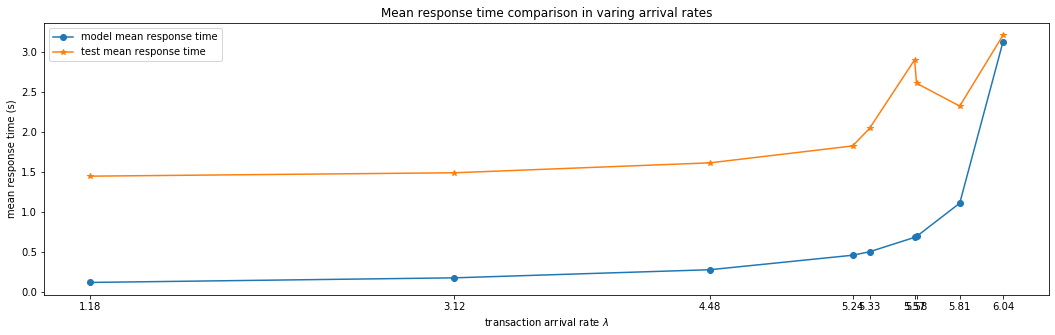

In [61]:
mu1,mu2 = 14,11

df = df.sort_values(by='Requests/s')
lambdas = np.round(df['Requests/s'].values,2)
meanRTS = (df['Total Average Response Time']/1000).values

ls_EN, ls_ER, ls_rho = [],[],[]
for lam in lambdas:
    queue = PhQueue(lam,mu1,mu2)
    EN,ER = queue.measurePerf()
    rho = queue.checkStability()
    ls_EN.append(EN)
    ls_ER.append(ER)
    ls_rho.append(rho)
    print(lam,'EN:',EN, ' ER:', ER, ' rho:', rho)
plotComparison(lambdas,ls_ER,meanRTS)